## Intersection over Union (IoU)

$$
IOU = \frac{\text{area of overlap}}{\text{area of union}} = \frac{intersection\_area}{area\_bounding\_box1 + area\_bounding\_box2 - intersection\_area}
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)
import matplotlib.patches as patches
import tensorflow as tf

##### Plotting Bounding Boxes

In [2]:
def plot_bounding_box(dbox_data):
    width = dbox_data[:, 2] - dbox_data[:, 0] + 1
    height = dbox_data[:, 3] - dbox_data[:, 1] + 1

    color = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
    fig = plt.figure(figsize=(15,15))

    ax = fig.add_subplot(111, aspect='equal')

    for i in range(tf.shape(dbox_data)[0]):
        rect = patches.Rectangle((dbox_data[i, 0], dbox_data[i, 1]), width[i], height[i], linewidth=2, edgecolor=color[i%8], facecolor='none')
        ax.add_patch(rect)
    
    ax.legend()

    plt.xticks(range(0, 1050, 50))
    plt.yticks(range(0, 1050, 50))

    plt.show()

In [3]:
detections = tf.Variable([
    [100, 100, 500, 600],
    [150, 320, 570, 620],
    [50, 150, 450, 800],
    [550, 300, 900, 500]
], dtype=tf.float32)

C:\Users\saurabh.bansal\AppData\Local\Temp\ipykernel_26112\647486156.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


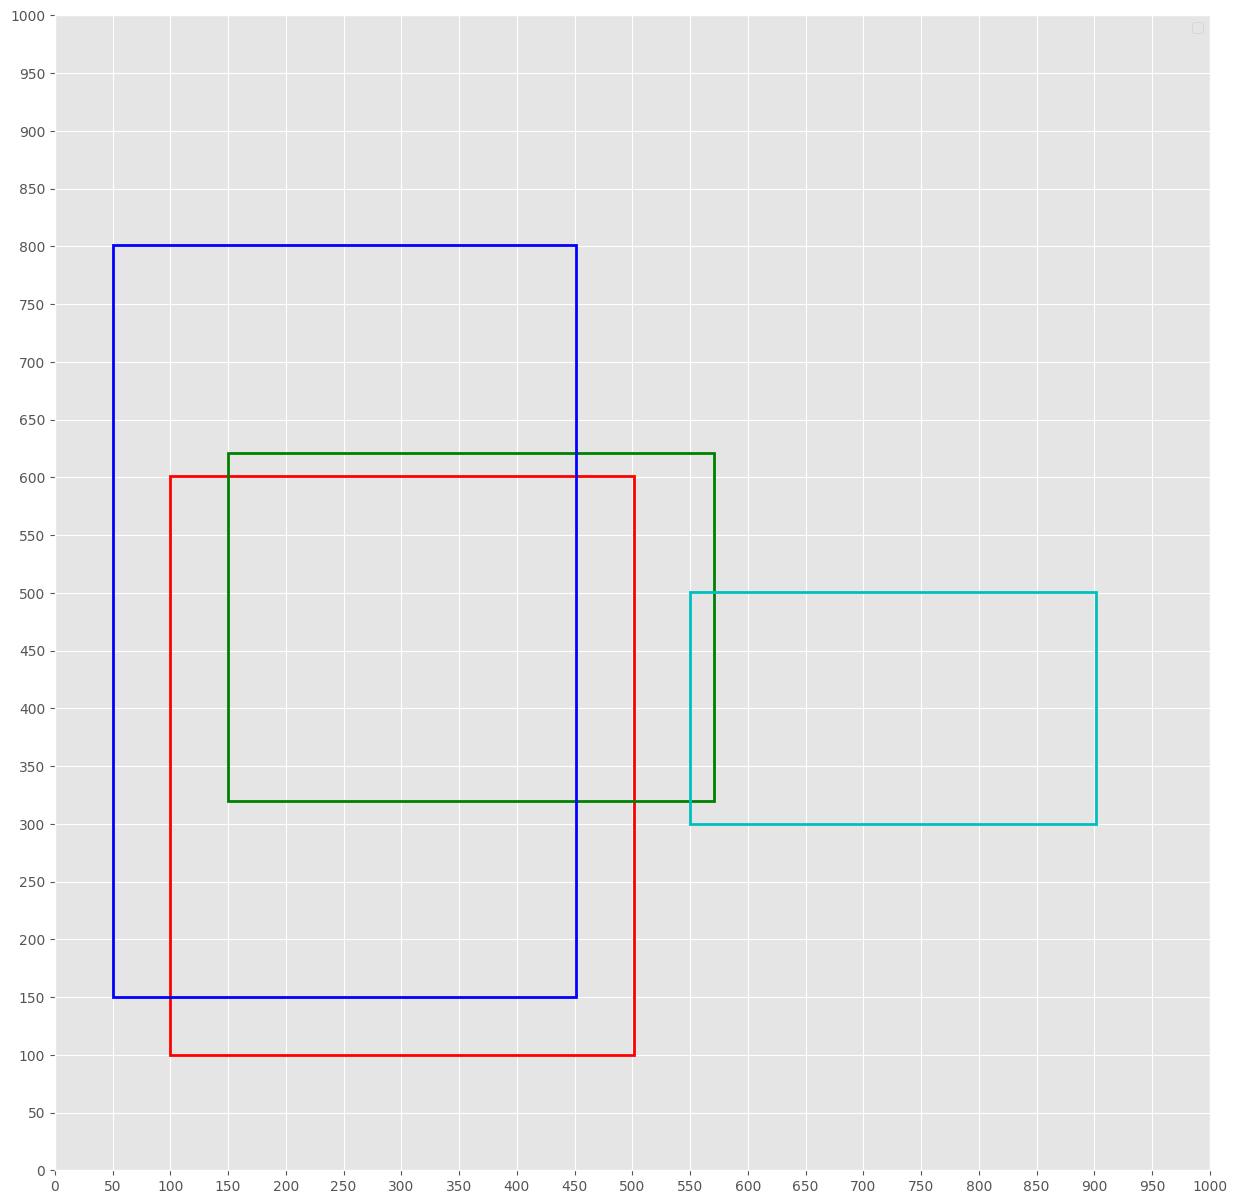

In [4]:
plot_bounding_box(detections)

##### Computing IoU

In [5]:
def intersection_over_union(dbox_data, area=None):
    if area is None:
        width = dbox_data[:, 2] - dbox_data[:, 0] + 1
        height = dbox_data[:, 3] - dbox_data[:, 1] + 1

        area = tf.multiply(width, height)

    xx1 = tf.math.maximum(dbox_data[0, 0], tf.transpose(dbox_data[1:, 0]))
    yy1 = tf.math.maximum(dbox_data[0, 1], tf.transpose(dbox_data[1:, 1]))
    xx2 = tf.math.minimum(dbox_data[0, 2], tf.transpose(dbox_data[1:, 2]))
    yy2 = tf.math.minimum(dbox_data[0, 3], tf.transpose(dbox_data[1:, 3]))

    intersection_width = tf.math.maximum((xx2 - xx1 +1), tf.Variable(0.0, tf.float32))
    intersection_height = tf.math.maximum((yy2 - yy1 +1), tf.Variable(0.0, tf.float32))
    intersection_area = tf.multiply(intersection_width, intersection_height)

    iou = intersection_area / (area[0] + area[1:] - intersection_area)

    return iou

In [6]:
iou = intersection_over_union(detections)
print(iou)

tf.Tensor([0.43071997 0.52132547 0.        ], shape=(3,), dtype=float32)


##### Computing Overlap

In [7]:
def overlap(dbox_data):
    xx1 = tf.math.maximum(dbox_data[0, 0], tf.transpose(dbox_data[1:, 0]))
    yy1 = tf.math.maximum(dbox_data[0, 1], tf.transpose(dbox_data[1:, 1]))
    xx2 = tf.math.minimum(dbox_data[0, 2], tf.transpose(dbox_data[1:, 2]))
    yy2 = tf.math.minimum(dbox_data[0, 3], tf.transpose(dbox_data[1:, 3]))

    intersection_width = tf.math.maximum((xx2 - xx1 +1), tf.Variable(0.0, tf.float32))
    intersection_height = tf.math.maximum((yy2 - yy1 +1), tf.Variable(0.0, tf.float32))
    intersection_area = tf.multiply(intersection_width, intersection_height)

    area_ref = (dbox_data[0, 2] - dbox_data[0, 0] + 1) * (dbox_data[0, 3] - dbox_data[0, 1] + 1)
    overlap = intersection_area / area_ref
    return overlap

In [8]:
print(overlap(detections))

tf.Tensor([0.4909433 0.7879553 0.       ], shape=(3,), dtype=float32)
